### Linear models for classification
#### Logistic regression

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

In [86]:
df = pd.read_csv('Iris.csv')
df = df.rename(index=str, columns={"Species": "Class"})

In [87]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


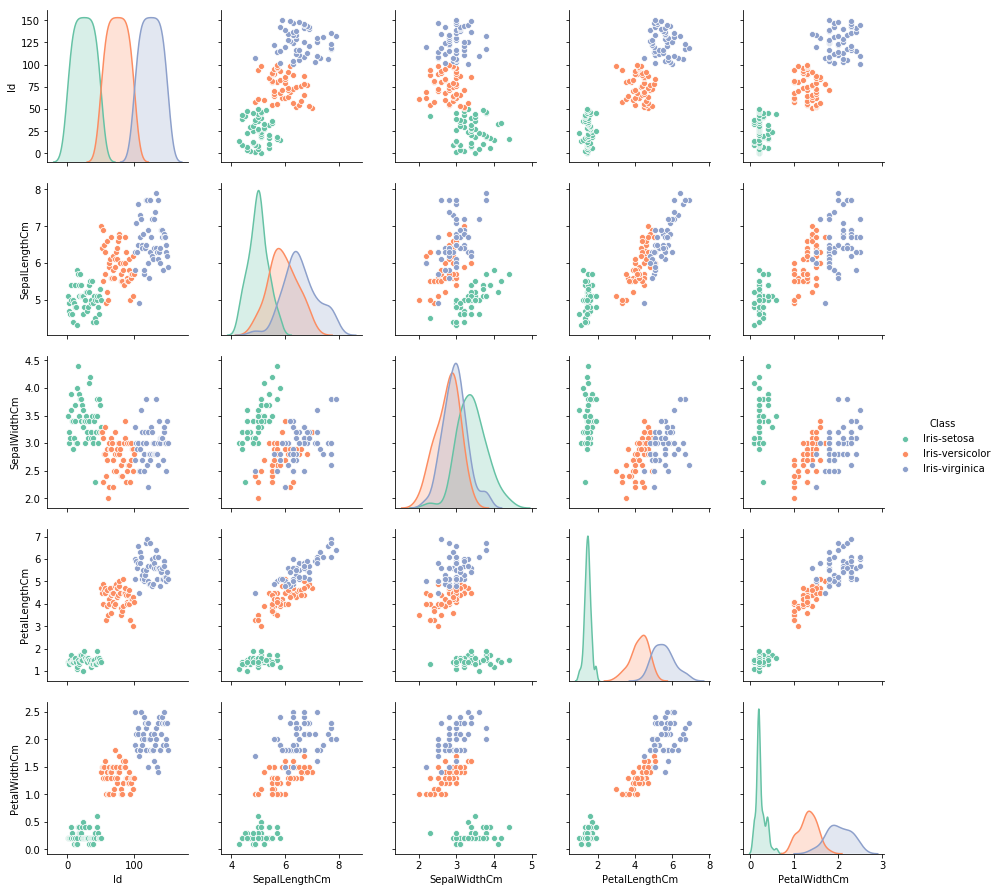

In [88]:
sns.pairplot(df,hue='Class',palette='Set2')

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X = df.drop(['Class','Id'],axis=1).values
y = df['Class'].values

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()

In [93]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [94]:
scaled_features = scaler.transform(X)

In [95]:
X = pd.DataFrame(scaled_features,columns=df.columns[1:5])
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [114]:
from sklearn.linear_model import LogisticRegression
classifier_lg = LogisticRegression()
classifier_lg.fit(X_train,y_train)

print(classifier_lg.intercept_)
print(classifier_lg.coef_)

[-1.47242144 -0.95084848 -2.31221568]
[[-0.77327931  1.16392902 -1.59890259 -1.44117894]
 [-0.32153279 -0.98367685  0.74333    -0.41498137]
 [ 0.41924365 -0.10612197  1.64296094  2.20386813]]


In [115]:
from sklearn.model_selection import cross_val_score
scores_dt = cross_val_score(classifier_lg, X, y, scoring='accuracy', cv=5)
print(scores_dt.mean())

0.9066666666666666


In [116]:
predictions = logistic.predict(X_test)

In [117]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics 

In [118]:
print(classification_report(y_test,predictions))
print("Decision Tree model accuracy(in %):", metrics.accuracy_score(y_test, predictions)*100)
print(confusion_matrix(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.88      0.94      0.91        16
 Iris-virginica       0.91      0.83      0.87        12

      micro avg       0.93      0.93      0.93        45
      macro avg       0.93      0.92      0.93        45
   weighted avg       0.93      0.93      0.93        45

Decision Tree model accuracy(in %): 93.33333333333333
[[17  0  0]
 [ 0 15  1]
 [ 0  2 10]]
